In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv("insurance_data.csv")
df.head(),df.shape

(   age  affordibility  bought_insurance
 0   22              1                 0
 1   25              0                 0
 2   47              1                 1
 3   52              0                 0
 4   46              1                 1,
 (28, 3))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [39]:
def sigmoid_numpy(X):
    return 1/(1+np.exp(-X))



In [40]:
import numpy as np

# Generate an array of 20 random integers between 0 and 9 (inclusive)
random_integers = np.random.randint(0,len(X_train_scaled), 20)

print(random_integers)


[ 6  6  4  6 19 19 20  1 19 14  8 16  8  9 18 19  4  6 12  9]


In [41]:
#X_train_scaled['affordibility'].iloc[random_integers].head()

In [42]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [95]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold,sample_size):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        # Generate an array of 20 random integers between 0 and 9 (inclusive)
        random_integers = np.random.randint(0,len(age), sample_size)
        age=age.iloc[random_integers]
        affordability=affordability.iloc[random_integers]
        y_true=y_true.iloc[random_integers]
    
    
        
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
        if i%1==0: # at every nth iteration record the cost and epoch value (increase n when data is big)
            cost_list.append(loss)
            epoch_list.append(i)

        if loss<=loss_thresold:
            break

    return w1, w2, bias,epoch_list,cost_list

In [101]:
#gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.1,5)

In [102]:
w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.0,5)

Epoch:0, w1:0.9794252057032253, w2:0.9864397204084637, bias:-0.24299317922831118, loss:0.9004796053306663
Epoch:1, w1:0.957779200683726, w2:0.991338066338557, bias:-0.4437626911701757, loss:0.6991050709651618
Epoch:2, w1:0.9583381611271351, w2:1.0085718864569864, bias:-0.46514994852585895, loss:0.4416717512912318
Epoch:3, w1:0.9590218453129282, w2:1.0258552094907962, bias:-0.4852657276964235, loss:0.438163667499493
Epoch:4, w1:0.9598141146397201, w2:1.043170156732321, bias:-0.5042553003217642, loss:0.43474151410182255
Epoch:5, w1:0.9515717685337828, w2:1.0547240588972986, bias:-0.5975367005121902, loss:0.5108530270990713
Epoch:6, w1:0.9473213110759052, w2:1.0670376377932755, bias:-0.6748493287882167, loss:0.47308950341200456
Epoch:7, w1:0.9466264099617597, w2:1.0799653861118104, bias:-0.7383518457008367, loss:0.4416381971036551
Epoch:8, w1:0.9527968567338186, w2:1.1000719064424322, bias:-0.7270986745136632, loss:0.4048003596651445
Epoch:9, w1:0.9648788270717803, w2:1.1262272237160933, 

Epoch:97, w1:0.7558151592593007, w2:1.162495488241839, bias:-3.971507929912193, loss:0.023464669487923563
Epoch:98, w1:0.7550596660716479, w2:1.162495488241839, bias:-3.982970585173131, loss:0.02319218208434189
Epoch:99, w1:0.7543127481503005, w2:1.162495488241839, bias:-3.9943031329452987, loss:0.022925897084630387
Epoch:100, w1:0.7535742146687392, w2:1.162495488241839, bias:-4.005508468527608, loss:0.022665606300137545
Epoch:101, w1:0.7528438810633122, w2:1.162495488241839, bias:-4.016589392196154, loss:0.022411110716718845
Epoch:102, w1:0.7521215687633506, w2:1.162495488241839, bias:-4.027548613299022, loss:0.02216221999659975
Epoch:103, w1:0.7514071049356131, w2:1.162495488241839, bias:-4.038388754133659, loss:0.021918752012252685
Epoch:104, w1:0.7507003222421621, w2:1.162495488241839, bias:-4.049112353620503, loss:0.02168053240991891
Epoch:105, w1:0.7500010586108319, w2:1.162495488241839, bias:-4.059721870785513, loss:0.02144739420060409
Epoch:106, w1:0.7493091570175167, w2:1.1624

Epoch:184, w1:0.7100964678217918, w2:1.162495488241839, bias:-4.665170834481287, loss:0.011571942814993942
Epoch:185, w1:0.7097195086310726, w2:1.162495488241839, bias:-4.6708902153059935, loss:0.01150468750572485
Epoch:186, w1:0.7093447153151279, w2:1.162495488241839, bias:-4.676576734582395, loss:0.011438206129152188
Epoch:187, w1:0.7089720632332871, w2:1.162495488241839, bias:-4.682230766168945, loss:0.011372485440615185
Epoch:188, w1:0.7086015281617958, w2:1.162495488241839, bias:-4.687852677598469, loss:0.011307512495311365
Epoch:189, w1:0.7082330862844834, w2:1.162495488241839, bias:-4.69344283021976, loss:0.011243274639872914
Epoch:190, w1:0.7078667141836904, w2:1.162495488241839, bias:-4.69900157933524, loss:0.011179759504225017
Epoch:191, w1:0.7075023888314451, w2:1.162495488241839, bias:-4.704529274334823, loss:0.011116954993714677
Epoch:192, w1:0.707140087580884, w2:1.162495488241839, bias:-4.710026258826096, loss:0.011054849281501243
Epoch:193, w1:0.7067797881579055, w2:1.1

Epoch:260, w1:0.6862931307535163, w2:1.162495488241839, bias:-5.026324914137881, loss:0.008008575776729107
Epoch:261, w1:0.6860313235537058, w2:1.162495488241839, bias:-5.03029716130742, loss:0.007976219975371244
Epoch:262, w1:0.6857705656827633, w2:1.162495488241839, bias:-5.034253487625168, loss:0.007944123794861953
Epoch:263, w1:0.6855108487876631, w2:1.162495488241839, bias:-5.0381940198266895, loss:0.00791228412906757
Epoch:264, w1:0.6852521646145259, w2:1.162495488241839, bias:-5.042118883143254, loss:0.007880697921134052
Epoch:265, w1:0.6849945050070583, w2:1.162495488241839, bias:-5.04602820132552, loss:0.007849362162514478
Epoch:266, w1:0.684737861905023, w2:1.162495488241839, bias:-5.049922096666747, loss:0.007818273892019462
Epoch:267, w1:0.6844822273427379, w2:1.162495488241839, bias:-5.053800690025554, loss:0.007787430194890853
Epoch:268, w1:0.6842275934476061, w2:1.162495488241839, bias:-5.0576641008482435, loss:0.007756828201895447
Epoch:269, w1:0.6839739524386724, w2:1.

Epoch:354, w1:0.665386112443487, w2:1.162495488241839, bias:-5.3435348471176445, loss:0.005796346792638811
Epoch:355, w1:0.6651962058657175, w2:1.162495488241839, bias:-5.346416188297596, loss:0.005779350680899761
Epoch:356, w1:0.6650068529149025, w2:1.162495488241839, bias:-5.349289129620307, loss:0.0057624537366278246
Epoch:357, w1:0.6648180503794154, w2:1.162495488241839, bias:-5.352153719813904, loss:0.005745655095667127
Epoch:358, w1:0.6646297950754552, w2:1.162495488241839, bias:-5.355010007184336, loss:0.0057289539038621485
Epoch:359, w1:0.6644420838467258, w2:1.162495488241839, bias:-5.357858039620231, loss:0.005712349316914032
Epoch:360, w1:0.6642549135641208, w2:1.162495488241839, bias:-5.360697864597686, loss:0.005695840500238475
Epoch:361, w1:0.6640682811254124, w2:1.162495488241839, bias:-5.363529529184985, loss:0.005679426628827241
Epoch:362, w1:0.6638821834549447, w2:1.162495488241839, bias:-5.366353080047254, loss:0.00566310688711059
Epoch:363, w1:0.6636966175033312, w2

Epoch:451, w1:0.6491488248334047, w2:1.162495488241839, bias:-5.589893693615445, loss:0.004509344590605259
Epoch:452, w1:0.6490008939878888, w2:1.162495488241839, bias:-5.592138161616376, loss:0.004499041528457061
Epoch:453, w1:0.6488532996142065, w2:1.162495488241839, bias:-5.5943775245274185, loss:0.004488785361764846
Epoch:454, w1:0.6487060401877643, w2:1.162495488241839, bias:-5.596611805480334, loss:0.004478575771438004
Epoch:455, w1:0.6485591141942963, w2:1.162495488241839, bias:-5.598841027450193, loss:0.004468412441271515
Epoch:456, w1:0.6484125201297706, w2:1.162495488241839, bias:-5.601065213256791, loss:0.004458295057914094
Epoch:457, w1:0.6482662565002975, w2:1.162495488241839, bias:-5.603284385566039, loss:0.004448223310835568
Epoch:458, w1:0.6481203218220386, w2:1.162495488241839, bias:-5.605498566891346, loss:0.004438196892295585
Epoch:459, w1:0.6479747146211171, w2:1.162495488241839, bias:-5.607707779594983, loss:0.0044282154973118906
Epoch:460, w1:0.6478294334335286, w

Epoch:541, w1:0.6370263701309243, w2:1.162495488241839, bias:-5.773820592549626, loss:0.0037385727602004233
Epoch:542, w1:0.6369036299156015, w2:1.162495488241839, bias:-5.775682857885559, loss:0.003731484006871102
Epoch:543, w1:0.63678112155797, w2:1.162495488241839, bias:-5.777541605380658, loss:0.0037244220475617152
Epoch:544, w1:0.6366588441849323, w2:1.162495488241839, bias:-5.779396848281918, loss:0.0037173867307854795
Epoch:545, w1:0.6365367969283091, w2:1.162495488241839, bias:-5.781248599761719, loss:0.003710377906194628
Epoch:546, w1:0.6364149789248016, w2:1.162495488241839, bias:-5.783096872918385, loss:0.003703395424569747
Epoch:547, w1:0.6362933893159557, w2:1.162495488241839, bias:-5.784941680776736, loss:0.0036964391378089974
Epoch:548, w1:0.6361720272481258, w2:1.162495488241839, bias:-5.7867830362886385, loss:0.0036895088989181207
Epoch:549, w1:0.6360508918724387, w2:1.162495488241839, bias:-5.788620952333547, loss:0.0036826045619997765
Epoch:550, w1:0.6359299823447582

Epoch:635, w1:0.6263984269015418, w2:1.162495488241839, bias:-5.935072144995432, loss:0.0031720117628586944
Epoch:636, w1:0.6262942280639021, w2:1.162495488241839, bias:-5.936653092876861, loss:0.0031669051174235464
Epoch:637, w1:0.6261901964431241, w2:1.162495488241839, bias:-5.9382315036748725, loss:0.003161814868667686
Epoch:638, w1:0.6260863315040048, w2:1.162495488241839, bias:-5.939807385509786, loss:0.003156740937808852
Epoch:639, w1:0.6259826327139048, w2:1.162495488241839, bias:-5.941380746463028, loss:0.0031516832465680266
Epoch:640, w1:0.6258790995427316, w2:1.162495488241839, bias:-5.94295159457738, loss:0.0031466417171661766
Epoch:641, w1:0.6257757314629235, w2:1.162495488241839, bias:-5.944519937857226, loss:0.00314161627231955
Epoch:642, w1:0.6256725279494338, w2:1.162495488241839, bias:-5.946085784268793, loss:0.003136606835236317
Epoch:643, w1:0.6255694884797145, w2:1.162495488241839, bias:-5.9476491417403965, loss:0.0031316133296124134
Epoch:644, w1:0.6254666125337004

Epoch:729, w1:0.6172699151654252, w2:1.162495488241839, bias:-6.073573702370997, loss:0.0027544393752747536
Epoch:730, w1:0.6171793953785076, w2:1.162495488241839, bias:-6.074947106034573, loss:0.0027505867248376423
Epoch:731, w1:0.6170890018521019, w2:1.162495488241839, bias:-6.076318594021418, loss:0.0027467448257788313
Epoch:732, w1:0.6169987342348328, w2:1.162495488241839, bias:-6.077688171662743, loss:0.002742913633186619
Epoch:733, w1:0.6169085921767887, w2:1.162495488241839, bias:-6.079055844267549, loss:0.0027390931023992637
Epoch:734, w1:0.616818575329514, w2:1.162495488241839, bias:-6.080421617122751, loss:0.0027352831890028574
Epoch:735, w1:0.6167286833460003, w2:1.162495488241839, bias:-6.081785495493304, loss:0.002731483848829647
Epoch:736, w1:0.6166389158806789, w2:1.162495488241839, bias:-6.083147484622319, loss:0.002727695037956466
Epoch:737, w1:0.6165492725894127, w2:1.162495488241839, bias:-6.084507589731185, loss:0.002723916712702945
Epoch:738, w1:0.6164597531294884,

Epoch:808, w1:0.6104821049876656, w2:1.162495488241839, bias:-6.1765611671370095, loss:0.0024799931577072516
Epoch:809, w1:0.6104005819007751, w2:1.162495488241839, bias:-6.1777980691450045, loss:0.002476868924843892
Epoch:810, w1:0.6103191612588196, w2:1.162495488241839, bias:-6.179033416816054, loss:0.00247375254648786
Epoch:811, w1:0.6102378428048872, w2:1.162495488241839, bias:-6.180267214048132, loss:0.002470643993074512
Epoch:812, w1:0.6101566262830308, w2:1.162495488241839, bias:-6.181499464724574, loss:0.0024675432351873375
Epoch:813, w1:0.6100755114382629, w2:1.162495488241839, bias:-6.182730172714157, loss:0.0024644502435570595
Epoch:814, w1:0.609994498016551, w2:1.162495488241839, bias:-6.183959341871165, loss:0.0024613649890605207
Epoch:815, w1:0.609913585764813, w2:1.162495488241839, bias:-6.185186976035466, loss:0.002458287442719897
Epoch:816, w1:0.6098327744309122, w2:1.162495488241839, bias:-6.18641307903258, loss:0.002455217575702139
Epoch:817, w1:0.6097520637636529, w

Epoch:941, w1:0.6004509690829097, w2:1.162495488241839, bias:-6.328757711898834, loss:0.002123673362726525
Epoch:942, w1:0.6003811340234467, w2:1.162495488241839, bias:-6.329817278318272, loss:0.0021213813780682766
Epoch:943, w1:0.6003113741729357, w2:1.162495488241839, bias:-6.330875703636371, loss:0.002119094331444473
Epoch:944, w1:0.6002416893696858, w2:1.162495488241839, bias:-6.331932990306369, loss:0.002116812206922206
Epoch:945, w1:0.6001720794525273, w2:1.162495488241839, bias:-6.332989140773602, loss:0.002114534988637319
Epoch:946, w1:0.6001025442608082, w2:1.162495488241839, bias:-6.334044157475546, loss:0.002112262660793296
Epoch:947, w1:0.6000330836343932, w2:1.162495488241839, bias:-6.335098042841842, loss:0.002109995207661813
Epoch:948, w1:0.5999636974136606, w2:1.162495488241839, bias:-6.3361507992943364, loss:0.0021077326135816245
Epoch:949, w1:0.5998943854395007, w2:1.162495488241839, bias:-6.3372024292471085, loss:0.002105474862958453
Epoch:950, w1:0.599825147553313, 

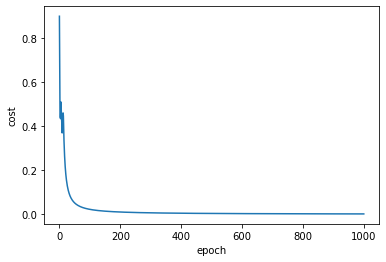

In [103]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(cost_list_mb, epoch_list_mb)